# Unstructured Data to Structured Data - Amazon Reviews

## Dataset Reading

In [2]:
%pylab inline
%matplotlib inline

import json,pandas,glob
import os.path
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
read_files = glob.glob("Data/laptops/*.json")
Final_Laptops = pandas.DataFrame()
for i in range(0,len(read_files)):
    with open(read_files[i], 'rb') as x:
        JSONFILE = json.load(x)
    prod = JSONFILE['ProductInfo']
    Review = JSONFILE['Reviews']
    #d1.append(prod)
    #d2.append(Review)
    Reviews = pandas.DataFrame(Review)
    Products = pandas.DataFrame(prod, index = Reviews.index)
    merge = pandas.concat([Reviews, Products], axis=1,join = 'inner')
    Final_Laptops = pandas.concat([Final_Laptops,merge])
    #Final_Laptops.drop('ImgURL')
    Final_Laptops = Final_Laptops.drop('ImgURL', axis = 1)
Final_Laptops.head()

,Author,Content,Date,Features,Name,Overall,Price,ProductID,ReviewID,Title
0,"Peter in McLean ""PeterK""",I've had the S7-391 with 4Gb RAM and a 256 GB ...,"November 29, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,3.0,"$1,299.99",B00AVYPLF4,R1S7JV3G6KBOTU,"Thin, light and good screen. Mediocre battery ..."
1,tungty,This would be a 5-star review if it were not f...,"June 16, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,4.0,"$1,299.99",B00AVYPLF4,R2HU61RJX6H19A,"Beautiful, light computer but Acer Quality Con..."
2,Julio Perez,Exactly as described! Fast laptop. One of the ...,"May 17, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,5.0,"$1,299.99",B00AVYPLF4,R2W94ZVV3L452Z,Great device!
3,rid1,I bought this laptop after doing my research a...,"May 5, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,5.0,"$1,299.99",B00AVYPLF4,R1NA3QNCRJ297N,Quite good
4,Rev,"After living with the Aspire S7 for 5 months, ...","August 21, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,1.0,"$1,299.99",B00AVYPLF4,R1CYHY70XPLRNA,Very disappointing


In [4]:
Final_DF = Final_Laptops.set_index('ProductID')

## Data Filtering

In [5]:
Final_DF_notnull = Final_DF[Final_DF['Name'].notnull()]

In [6]:
Final_DF_null = Final_DF[Final_DF['Name'].isnull()]

In [7]:
from textblob import TextBlob, Word

x = TextBlob(Final_DF.Title[0])

p_of_s = x.tags #parts of speech tags

len(x.words) #word count

x.sentiment #shows pos and neg score

Sentiment(polarity=-0.20000000000000004, subjectivity=0.8416666666666668)

In [8]:
x

TextBlob("Thin, light and good screen. Mediocre battery life, funky WiFi and BT. Typing is miserable and frustrating.")

In [9]:
Final_DF_notnull.Title.head()

ProductID
B00AVYPLF4    Thin, light and good screen. Mediocre battery ...
B00AVYPLF4    Beautiful, light computer but Acer Quality Con...
B00AVYPLF4                                        Great device!
B00AVYPLF4                                           Quite good
B00AVYPLF4                                   Very disappointing
Name: Title, dtype: object

In [10]:
Final_DF_notnull.count()

Author      20642
Content     20666
Date        20669
Features    20577
Name        20670
Overall     20670
Price       19377
ReviewID    20670
Title       20670
dtype: int64

## Data Cleaning

In [11]:
Final_DF_Names = Final_DF_notnull.Name.str.lower()
Final_DF_Content = Final_DF_notnull.Content.str.lower()
Final_DF_Features = Final_DF_notnull.Features.str.lower()

In [12]:
Makes = Final_DF_Names.str.split().str.get(0)
Content_DF = Final_DF_Content.to_frame('content')
Makes_DF = Makes.to_frame('Make')
Features_DF = Final_DF_Features.to_frame('features')
Names_DF = Final_DF_Names.to_frame('Product Name')
Names_DF[:5]

,Product Name
ProductID,
B00AVYPLF4,acer aspire s7-391-6468 13.3-inch touchscreen ...
B00AVYPLF4,acer aspire s7-391-6468 13.3-inch touchscreen ...
B00AVYPLF4,acer aspire s7-391-6468 13.3-inch touchscreen ...
B00AVYPLF4,acer aspire s7-391-6468 13.3-inch touchscreen ...
B00AVYPLF4,acer aspire s7-391-6468 13.3-inch touchscreen ...


In [13]:
dataFrame = pandas.concat([Final_DF_notnull, Makes_DF, Names_DF, Content_DF, Features_DF],axis = 1, join_axes=[Final_DF_notnull.index])

In [14]:
dataFrame.head()

,Author,Content,Date,Features,Name,Overall,Price,ReviewID,Title,Make,Product Name,content,features
ProductID,,,,,,,,,,,,,
B00AVYPLF4,"Peter in McLean ""PeterK""",I've had the S7-391 with 4Gb RAM and a 256 GB ...,"November 29, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,3.0,"$1,299.99",R1S7JV3G6KBOTU,"Thin, light and good screen. Mediocre battery ...",acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,i've had the s7-391 with 4gb ram and a 256 gb ...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...
B00AVYPLF4,tungty,This would be a 5-star review if it were not f...,"June 16, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,4.0,"$1,299.99",R2HU61RJX6H19A,"Beautiful, light computer but Acer Quality Con...",acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,this would be a 5-star review if it were not f...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...
B00AVYPLF4,Julio Perez,Exactly as described! Fast laptop. One of the ...,"May 17, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,5.0,"$1,299.99",R2W94ZVV3L452Z,Great device!,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,exactly as described! fast laptop. one of the ...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...
B00AVYPLF4,rid1,I bought this laptop after doing my research a...,"May 5, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,5.0,"$1,299.99",R1NA3QNCRJ297N,Quite good,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,i bought this laptop after doing my research a...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...
B00AVYPLF4,Rev,"After living with the Aspire S7 for 5 months, ...","August 21, 2013",Intel Core i5-3337U 1.8 GHz (3 MB Cache)\n4 GB...,Acer Aspire S7-391-6468 13.3-Inch Touchscreen ...,1.0,"$1,299.99",R1CYHY70XPLRNA,Very disappointing,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,"after living with the aspire s7 for 5 months, ...",intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...


In [15]:
dataFrame = dataFrame.drop(['Content', 'Features','Name'], axis=1)

In [16]:
dataFrame = dataFrame.loc[dataFrame['Make'].isin(['asus','apple','acer','hp','samsung','dell','lenovo','toshiba','gateway','sony'])]

In [17]:
dataFrame = dataFrame.reset_index()

In [18]:
df_year = dataFrame['Date'][dataFrame['Date'].notnull()].str.split().str.get(2).to_frame('Year')

In [19]:
dataFrame = dataFrame.join(df_year)

In [20]:
dataFrame['Price'] = dataFrame['Price'].str.strip('$')
dataFrame['Price'] = dataFrame['Price'].str.replace('Unavailable', '')
dataFrame['Price'] = dataFrame['Price'].str.replace(',', '')

dataFrame['Price'].replace('', np.nan, inplace=True)
dataFrame['Price'] = dataFrame['Price'].apply(pandas.to_numeric)
dataFrame.dropna(subset=['Price'], inplace=True)

dataFrame.head()

,ProductID,Author,Date,Overall,Price,ReviewID,Title,Make,Product Name,content,features,Year
0,B00AVYPLF4,"Peter in McLean ""PeterK""","November 29, 2013",3.0,1299.99,R1S7JV3G6KBOTU,"Thin, light and good screen. Mediocre battery ...",acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,i've had the s7-391 with 4gb ram and a 256 gb ...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...,2013
1,B00AVYPLF4,tungty,"June 16, 2013",4.0,1299.99,R2HU61RJX6H19A,"Beautiful, light computer but Acer Quality Con...",acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,this would be a 5-star review if it were not f...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...,2013
2,B00AVYPLF4,Julio Perez,"May 17, 2013",5.0,1299.99,R2W94ZVV3L452Z,Great device!,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,exactly as described! fast laptop. one of the ...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...,2013
3,B00AVYPLF4,rid1,"May 5, 2013",5.0,1299.99,R1NA3QNCRJ297N,Quite good,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,i bought this laptop after doing my research a...,intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...,2013
4,B00AVYPLF4,Rev,"August 21, 2013",1.0,1299.99,R1CYHY70XPLRNA,Very disappointing,acer,acer aspire s7-391-6468 13.3-inch touchscreen ...,"after living with the aspire s7 for 5 months, ...",intel core i5-3337u 1.8 ghz (3 mb cache)\n4 gb...,2013


In [280]:
dataFrame = dataFrame.set_index(['ProductID'])

In [21]:
from collections import Counter

words = dataFrame.content[2].split()
wordCount = Counter(words)

In [22]:
wordCount

Counter({u'and': 1,
         u'around.': 1,
         u'as': 1,
         u'described!': 1,
         u'exactly': 1,
         u'extremely': 1,
         u'fast': 1,
         u'fast,': 1,
         u'great': 1,
         u'high': 1,
         u'highly': 1,
         u'it!': 1,
         u'its': 1,
         u'laptop.': 1,
         u'of': 1,
         u'one': 1,
         u'practical': 1,
         u'quality': 1,
         u'recommend': 1,
         u'resolution.': 1,
         u'screen': 1,
         u'slimmest': 1,
         u'super': 1,
         u'the': 1,
         u'with': 1})

In [23]:
len(dataFrame.content[2])

166

In [24]:
TextBlob((dataFrame.content[2])).words

WordList([u'exactly', u'as', u'described', u'fast', u'laptop', u'one', u'of', u'the', u'slimmest', u'around', u'extremely', u'fast', u'practical', u'and', u'super', u'great', u'quality', u'screen', u'with', u'its', u'high', u'resolution', u'highly', u'recommend', u'it'])

In [25]:
from nltk.corpus import stopwords
#nltk.download()
import nltk
import re

def filter_stopwords1(text):
    xt = stopwords.words("english")
    text = ' '.join([word for word in text.split() if word not in xt])
    return text

def filter_stopwords2(text):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    return pattern.sub('', text)

def filtered_words(text):
    return re.sub("[^\w]", " ", remove_stopwords(text)).split()

In [26]:
filter_stopwords2(dataFrame.content[2])

u'exactly described! fast laptop. one slimmest around. extremely fast, practical super great quality screen high resolution. highly recommend !'

In [27]:
TextBlob(filter_stopwords2(dataFrame.content[2])).words

WordList([u'exactly', u'described', u'fast', u'laptop', u'one', u'slimmest', u'around', u'extremely', u'fast', u'practical', u'super', u'great', u'quality', u'screen', u'high', u'resolution', u'highly', u'recommend'])

In [28]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

In [29]:
from nltk.stem import WordNetLemmatizer

lemmatiser = WordNetLemmatizer()
lemmatiser.lemmatize("amazing", pos="v")

u'amaze'

In [30]:
from stemming.porter2 import stem
stem("dimensionality")

'dimension'

In [31]:
top10 = dataFrame['Make'].value_counts()[:10]

top10.to_frame('Count')

,Count
asus,2749
acer,2203
apple,1656
hp,1054
lenovo,857
dell,806
toshiba,504
samsung,428
sony,107
gateway,89


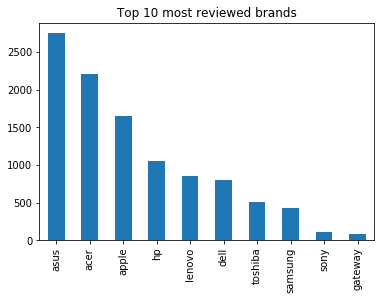

In [32]:
import matplotlib.pyplot as plt

top10.plot(x = 'index', y = 'Count', kind = 'bar')
plt.title("Top 10 most reviewed brands")
plt.show()

In [33]:
pwd

u'/Users/balaram_remala/Documents/GitHub/CORPUS/Project_Balaram'

In [34]:
dataFrame.to_pickle(path = '/Users/balaram_remala/Documents/GitHub/CORPUS/Project_Balaram/Data/Laptops_DataFrame', compression = None)

In [35]:
#from wordcloud import WordCloud, STOPWORDS

#word_count = WordCloud().generate(' '.join(top10.Count))

#plt.imshow(word_cloud)
#plt.axis('off')
#plt.show()

## Applying NaiveBayes Classification on Reviews to get Positive/Negative

In [57]:
neg_words = pandas.read_csv('Data/words/negative-words.txt',encoding='utf-8')
neg_words['Tag'] = 'Negative'
pos_words = pandas.read_csv('Data/words/positive-words.txt',encoding='utf-8')
pos_words['Tag'] = 'Postive'
#neu_words = pandas.read_csv('Data/words/neutral-words.txt',encoding='utf-8')
#neu_words['Tag'] = 'Neutral'
neg_words.to_csv('Data/neg_words.csv', index = None)
pos_words.to_csv('Data/pos_words.csv', index = None)
#neu_words.to_csv('Data/neu_words.csv', index = None)

In [61]:
import glob

read_files = glob.glob("Data/*.csv")

with open("wordlist.csv", "wb") as outfile:
    for f in read_files:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

In [63]:
from textblob.classifiers import NaiveBayesClassifier

with open('wordlist.csv', 'r') as fp:
     cl = NaiveBayesClassifier(fp, format="csv")

In [64]:
cl.classify(filter_stopwords2(dataFrame['content'][0]))

u'Postive'

In [65]:
#sample = df_make.Title.str.lower()
for i in range(10):
    print(cl.classify(dataFrame.Title[i])+ "---\t----" +dataFrame.Title[i])

Negative---	----Thin, light and good screen. Mediocre battery life, funky WiFi and BT. Typing is miserable and frustrating.
Negative---	----Beautiful, light computer but Acer Quality Control is terrible.
Postive---	----Great device!
Postive---	----Quite good
Negative---	----Very disappointing
Postive---	----Excellent Ultrabook
Negative---	----Great machine - horrible wifi !!
Postive---	----Sexiest ultrabook around
Postive---	----Slim,light and fast but WAY TOO LOUD
Postive---	----Great computer!


In [66]:
global replacements
replacements = {  
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "dont" : "do not",
    ":)" : "good",
    "=)" : "good",
    ":(" : "bad",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "i'd" : "I would",
    "i'd" : "I had",
    "gr8" : "great",
    "gud":"good",
    "i'll" : "I will",
    "i'm" : "I am",
    "isn't" : "is not",
    "it's" : "it is",
    "it'll":"it will",
    "i've" : "I have",
    "let's" : "let us",
    "mightn't" : "might not",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "we'd" : "we would",
    "we're" : "we are",
    "weren't" : "were not",
    "we've" : "we have",
    "what'll" : "what will",
    "what're" : "what are",
    "what's" : "what is",
    "what've" : "what have",
    "where's" : "where is",
    "who'd" : "who would",
    "who'll" : "who will",
    "who're" : "who are",
    "who's" : "who is",
    "who've" : "who have",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "'re": " are",
    "wasn't": "was not",
    "we'll": "will",
    "didn't": "did not",
    "luv" : "love",    
    "r" : "are",  
    "u" : "you",
    "v" : "we",
    "gonna" : "going to",
    "lappy": "laptop",
    "da" : "the",
    "toppa da line":"top of the line",
    "dis" : "this",
    "osm" : "awesome"
    }

In [79]:
def get_tag(Content):
    txt = filter_stopwords2(Content)
    s = ' '.join([replacements.get(w, w) for w in txt.split()])
    return cl.classify(s)

In [80]:
get_tag(dataFrame.content[1])

u'Postive'

In [81]:
from autocorrect import spell

spell("scren")

'screen'

In [276]:
dataFrame[15:20]

,Author,Content,Date,Name,Overall,ReviewID,Title,Make,Tag
ProductID,,,,,,,,,
B00005RI8P,earthangel2080,I am EXTREMELY disappointed and feel cheated. ...,"February 16, 2011","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",1.0,ROLETUTVOA02M,Disappointed,apple,Negative
B00005RI8P,Tammy,I absolutely hate this product. I'm a single p...,"January 14, 2011","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",1.0,RIPGZW4IT9OT2,Apple ibook laptop,apple,Neutral
B00005RI8P,None,My first Mac after using PCs for years. I see...,"November 7, 2001","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",5.0,R2PVWYS3KJTHSM,Love it!,apple,Postive
B00005RI8P,None,This is a really great product. It can do anyt...,"September 18, 2001","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",5.0,RAZXK8MKNN669,Great,apple,Postive
B00005RI8P,None,"If you want to buy an iBook, buy a faster one....","August 7, 2002","Apple iBook Laptop (600-MHz PowerPC G3, 128 MB...",1.0,REIENEXZ05N96,Too slow,apple,Negative


### Review Analysis Based on Positive/Negative Counts

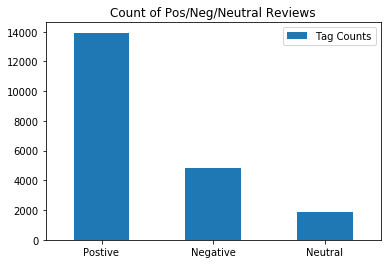

In [63]:
tag_count = dataFrame.Tag.value_counts().to_frame('Tag Counts')

tag_count.plot(y = 'Tag Counts', kind = 'bar',rot = False)
plt.title("Count of Pos/Neg/Neutral Reviews")
plt.show()

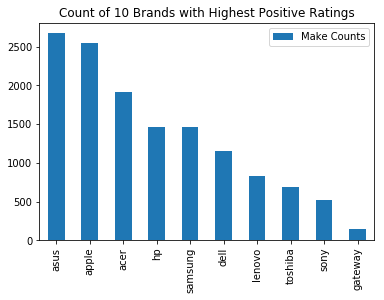

In [96]:
df_make_pos = dataFrame[(dataFrame['Tag'] == 'Postive')]

df_plot_pos = df_make_pos['Make'].value_counts()[:10].to_frame("Make Counts")

df_plot_pos.plot(y = 'Make Counts', kind = 'bar')
plt.title("Count of 10 Brands with Highest Positive Ratings")
plt.show()

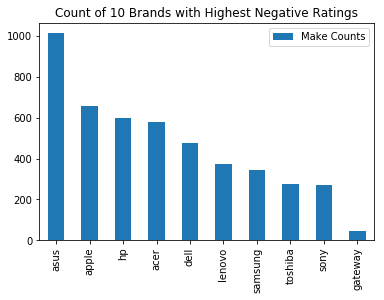

In [97]:
df_make_neg = dataFrame[(dataFrame['Tag'] == 'Negative')]

df_plot_neg = df_make_neg['Make'].value_counts()[:10].to_frame("Make Counts")

df_plot_neg.plot(y = 'Make Counts', kind = 'bar')
plt.title("Count of 10 Brands with Highest Negative Ratings")
plt.show()

In [108]:
df_tag_prop = df_plot_pos / df_plot_neg
df_tag_prop = df_tag_prop.rename(columns= {"Make Counts":"Ratio"})

In [109]:
df_tag_prop.sort_values([('Ratio')],ascending = False)

,Ratio
samsung,4.277778
apple,3.867982
acer,3.296552
gateway,2.979167
asus,2.639328
toshiba,2.509091
hp,2.454849
dell,2.407950
lenovo,2.221925
sony,1.904762


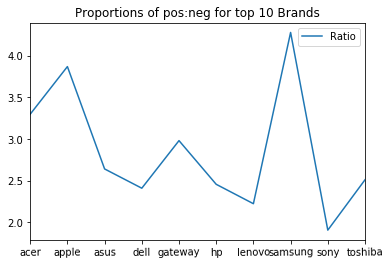

In [128]:
df_tag_prop.plot(y = 'Ratio', kind = 'line', rot = True)
plt.title("Proportions of pos:neg for top 10 Brands")
plt.show()